In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from scipy import stats as st
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Data Alignment

In [2]:
# Create a date range
date_range = pd.date_range(start='2021-01-01', end='2021-01-10', freq='H')

# Generate two time series with different frequencies
ts1 = pd.Series(np.random.randn(len(date_range)), index=date_range)
ts2 = pd.Series(np.random.randn(len(date_range[::3])), index=date_range[::3])

# Resampling
# Resample ts1 to daily frequency using mean aggregation
ts1_daily = ts1.resample('D').mean()
print("Time Series 1 - Daily Mean:")
print(ts1_daily)

# Resample ts2 to 6-hour frequency using sum aggregation
ts2_6h = ts2.resample('6H').sum()
print("\nTime Series 2 - 6-Hour Sum:")
print(ts2_6h)

# Data Alignment
# Align ts1_daily and ts2_6h using forward fill (ffill) method for missing values
# aligned_ts1, aligned_ts2 = ts1_daily.align(ts2_6h, method='ffill')
aligned_ts1, aligned_ts2 = ts2_6h.align(ts1_daily, method='ffill')


print("\nAligned Time Series 1:")
print(aligned_ts1)
print("\nAligned Time Series 2:")
print(aligned_ts2)

Time Series 1 - Daily Mean:
2021-01-01    0.063267
2021-01-02   -0.062647
2021-01-03   -0.272232
2021-01-04   -0.302300
2021-01-05   -0.104444
2021-01-06    0.209437
2021-01-07    0.054171
2021-01-08   -0.047350
2021-01-09   -0.229668
2021-01-10    1.563347
Freq: D, dtype: float64

Time Series 2 - 6-Hour Sum:
2021-01-01 00:00:00    1.882279
2021-01-01 06:00:00    0.987209
2021-01-01 12:00:00   -0.940157
2021-01-01 18:00:00   -1.712218
2021-01-02 00:00:00   -0.002827
2021-01-02 06:00:00   -1.478369
2021-01-02 12:00:00    1.439043
2021-01-02 18:00:00    0.810550
2021-01-03 00:00:00    0.096464
2021-01-03 06:00:00   -0.680911
2021-01-03 12:00:00    0.084237
2021-01-03 18:00:00    2.030969
2021-01-04 00:00:00   -0.159510
2021-01-04 06:00:00   -0.601649
2021-01-04 12:00:00    0.097495
2021-01-04 18:00:00   -0.452533
2021-01-05 00:00:00    0.664383
2021-01-05 06:00:00    0.819209
2021-01-05 12:00:00    3.108615
2021-01-05 18:00:00    0.859676
2021-01-06 00:00:00    1.272370
2021-01-06 06:00:

## Data Transformation

In [3]:
# Set the parameters for the Gaussian distribution
mean = 50
std_dev = 10
NUM_SAMPLE = 10000

# Create a random number generator
rng = np.random.default_rng()

# Generate normally distributed random numbers
gaussian_numbers = rng.normal(mean, std_dev, NUM_SAMPLE)

# Round the numbers to integers
data_sample = np.round(gaussian_numbers).astype(int)

In [4]:
print(f"Max:{max(data_sample)}")
print(f"Min:{min(data_sample)}")

print(f"Mean:{np.mean(data_sample)}")
print(f"Median:{np.median(data_sample)}")
print(f"Mode:{st.mode(data_sample)}")

Max:88
Min:11
Mean:50.1699
Median:50.0
Mode:ModeResult(mode=array([50]), count=array([435]))


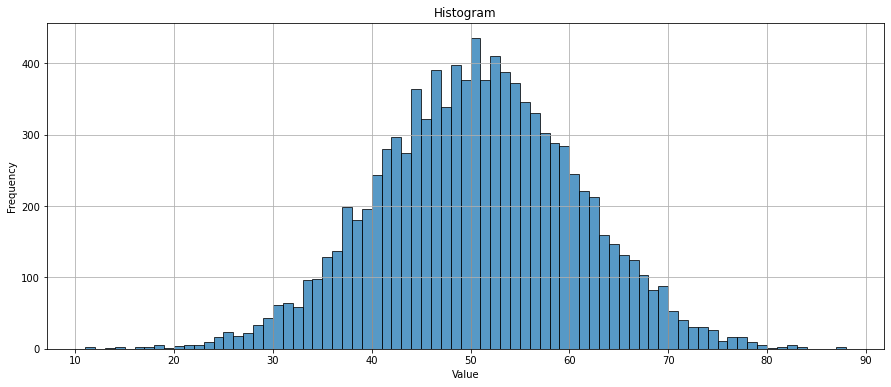

In [5]:
plt.figure(figsize=(15, 6))
# Plot the histogram
plt.hist(data_sample, bins=(max(data_sample)-min(data_sample)),range=(min(data_sample), max(data_sample)), edgecolor='black', alpha=0.75)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

plt.grid()
# Show the plot
plt.show()

In [6]:
# normalization
normalized_data = (data_sample.astype(float)-np.min(data_sample))/(np.max(data_sample)-np.min(data_sample))
# standardization
standardized_data = (data_sample.astype(float)-np.mean(data_sample))/np.std(data_sample)


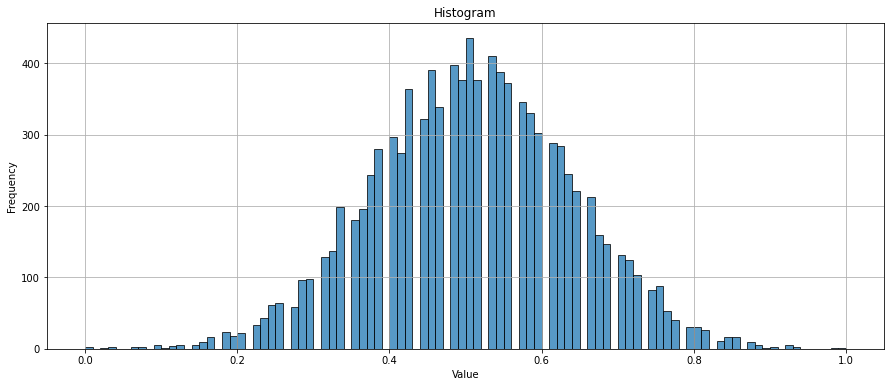

In [7]:
plt.figure(figsize=(15, 6))
plt.hist(normalized_data, bins=100,range=(0, 1), edgecolor='black', alpha=0.75)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

plt.grid()
# Show the plot
plt.show()

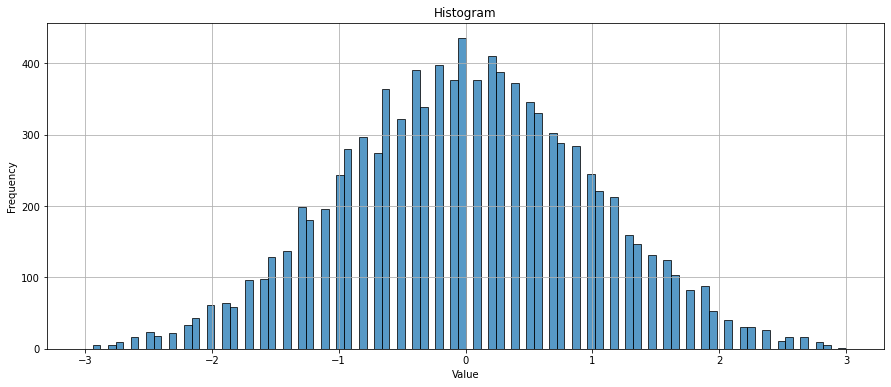

In [8]:
plt.figure(figsize=(15, 6))
plt.hist(standardized_data, bins=100,range=(-3, 3), edgecolor='black', alpha=0.75)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

plt.grid()
# Show the plot
plt.show()

### Outlier

In [9]:
new_data_sample = [v for v in data_sample]
new_data_sample[-1] = 150

In [10]:
print(f"Max:{max(new_data_sample)}")
print(f"Min:{min(new_data_sample)}")

print(f"Mean:{np.mean(new_data_sample)}")
print(f"Median:{np.median(new_data_sample)}")
print(f"Mode:{st.mode(new_data_sample)}")

Max:150
Min:11
Mean:50.1789
Median:50.0
Mode:ModeResult(mode=array([50]), count=array([435]))


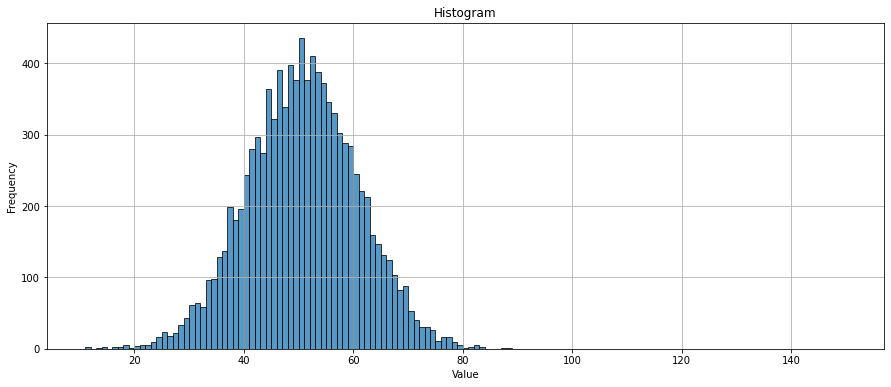

In [11]:
plt.figure(figsize=(15, 6))
# Plot the histogram
plt.hist(data_sample, bins=(max(new_data_sample)-min(new_data_sample)),range=(min(new_data_sample), max(new_data_sample)), edgecolor='black', alpha=0.75)
# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.grid()
# Show the plot
plt.show()

In [12]:
# normalization
normalized_data = (new_data_sample-np.min(new_data_sample))/(np.max(new_data_sample)-np.min(new_data_sample))
# standardization
standardized_data = (new_data_sample-np.mean(new_data_sample))/np.std(new_data_sample)


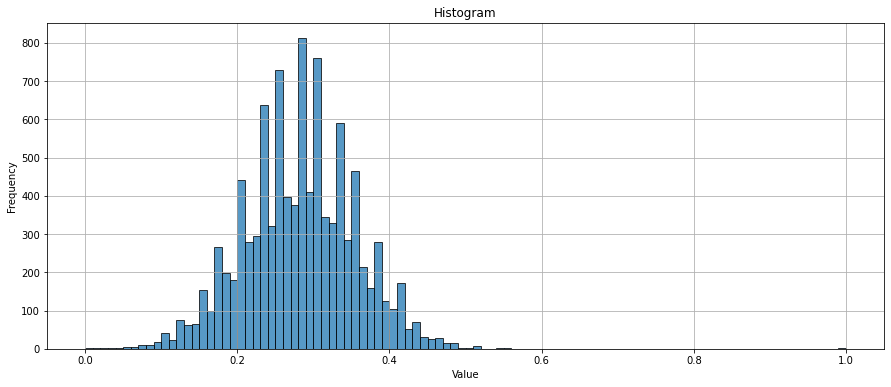

In [13]:
plt.figure(figsize=(15, 6))
plt.hist(normalized_data, bins=100,range=(0, 1), edgecolor='black', alpha=0.75)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

plt.grid()
# Show the plot
plt.show()

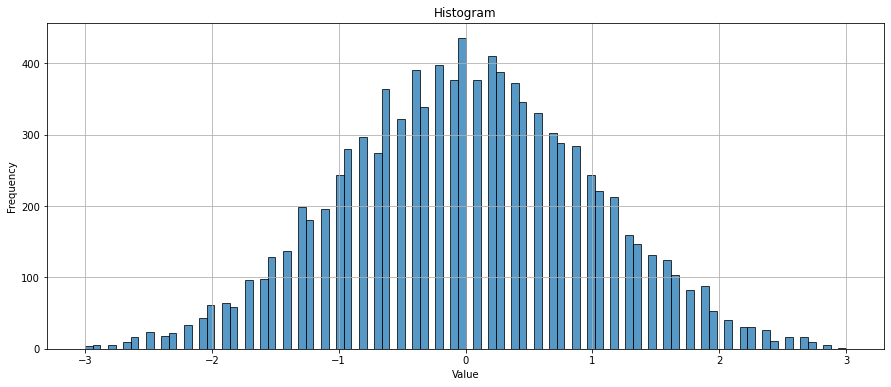

In [14]:
plt.figure(figsize=(15, 6))
plt.hist(standardized_data, bins=100,range=(-3, 3), edgecolor='black', alpha=0.75)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

plt.grid()
# Show the plot
plt.show()

## Descriptive statistics

In [15]:
# Generate data
# Number of iPhone sold by Roger each day
NUM_DAYS = 100000
MIN_VALUE = 0
MAX_VALUE = 150

### Uniform distribution

In [16]:
daily_iphone_sold = np.random.randint(MIN_VALUE, MAX_VALUE, NUM_DAYS)

In [17]:
daily_iphone_sold.mean()

74.55719

In [18]:
np.median(daily_iphone_sold)

75.0

In [19]:
st.mode(daily_iphone_sold)

ModeResult(mode=array([112]), count=array([732]))

In [20]:
np.histogram(daily_iphone_sold, range=(MIN_VALUE, MAX_VALUE), bins=int((MAX_VALUE-MIN_VALUE)/10))

(array([6713, 6599, 6658, 6718, 6595, 6722, 6663, 6649, 6621, 6489, 6764,
        6789, 6656, 6787, 6577]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150.]))

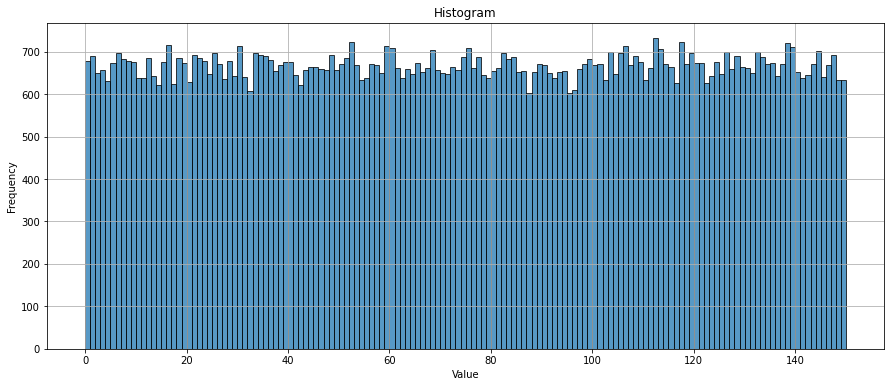

In [21]:
plt.figure(figsize=(15, 6))
# Plot the histogram
plt.hist(daily_iphone_sold, bins=(MAX_VALUE-MIN_VALUE),range=(MIN_VALUE, MAX_VALUE), edgecolor='black', alpha=0.75)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

plt.grid()
# Show the plot
plt.show()

### Gaussian 

In [22]:
# Set the parameters for the Gaussian distribution
mean = (MAX_VALUE-MIN_VALUE)/2
std_dev = 15

# Create a random number generator
rng = np.random.default_rng()

# Generate normally distributed random numbers
gaussian_numbers = rng.normal(mean, std_dev, NUM_DAYS)

# Round the numbers to integers
daily_iphone_sold = np.round(gaussian_numbers).astype(int)

# Clip the values to the range [MIN_VALUE, MAX_VALUE]
daily_iphone_sold = np.clip(daily_iphone_sold, MIN_VALUE, MAX_VALUE)


In [23]:
daily_iphone_sold.mean()

74.9915

In [24]:
np.median(daily_iphone_sold)

75.0

In [25]:
st.mode(daily_iphone_sold)

ModeResult(mode=array([75]), count=array([2728]))

In [26]:
np.histogram(daily_iphone_sold, range=(MIN_VALUE, MAX_VALUE), bins=15)

(array([    1,     8,   109,   782,  3598, 10641, 20602, 25989, 21616,
        11546,  4059,   906,   124,    17,     2]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150.]))

In [27]:
from collections import Counter

In [28]:
# Count the occurrences of each number using collections.Counter
counter = Counter(daily_iphone_sold)
# Get the top N numbers with the highest appearance
N = 5
top_n_numbers = counter.most_common(N)

# Print the top N numbers
print(f"Top {N} numbers with the highest appearance: {top_n_numbers}")

Top 5 numbers with the highest appearance: [(75, 2728), (76, 2678), (73, 2624), (71, 2602), (78, 2592)]


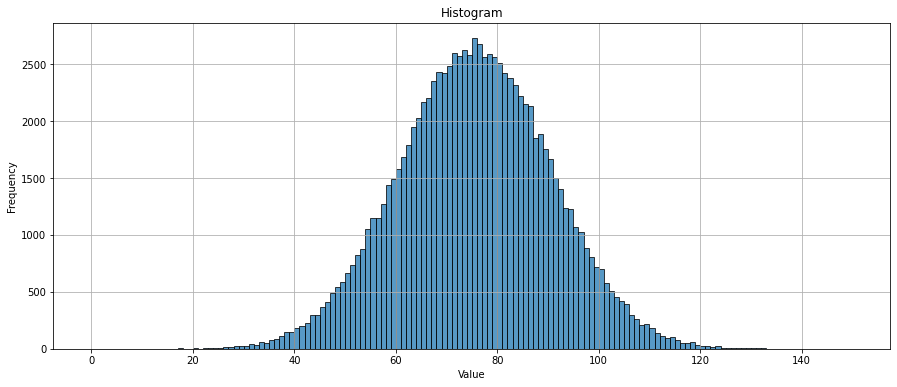

In [29]:
plt.figure(figsize=(15, 6))
# Plot the histogram
plt.hist(daily_iphone_sold, bins=(MAX_VALUE-MIN_VALUE),range=(MIN_VALUE, MAX_VALUE), edgecolor='black', alpha=0.75)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

plt.grid()
# Show the plot
plt.show()

### Log-Normal distribution

In [30]:

# Set the mean and standard deviation of the underlying normal distribution
mean = 1
std_dev = 0.5

# Generate random samples from the log-normal distribution
daily_iphone_sold = np.random.lognormal(mean, std_dev, NUM_DAYS)*10

# Convert the samples to integers
daily_iphone_sold = daily_iphone_sold.astype(int)
daily_iphone_sold = np.clip(daily_iphone_sold, MIN_VALUE, MAX_VALUE)

# Print the first 10 samples
print("First 10 samples:", daily_iphone_sold[:10])

First 10 samples: [21 39 42 54 39 14 19 23 28 31]


In [31]:
daily_iphone_sold.mean()

30.35196

In [32]:
np.median(daily_iphone_sold)

27.0

In [33]:
st.mode(daily_iphone_sold)

ModeResult(mode=array([21]), count=array([3362]))

In [34]:
np.histogram(daily_iphone_sold, range=(MIN_VALUE, MAX_VALUE), bins=15)

(array([ 2262, 24570, 30922, 20202, 10806,  5508,  2790,  1400,   678,
          370,   225,   105,    55,    44,    63]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150.]))

In [35]:
# Count the occurrences of each number using collections.Counter
counter = Counter(daily_iphone_sold)
# Get the top N numbers with the highest appearance
N = 5
top_n_numbers = counter.most_common(N)

# Print the top N numbers
print(f"Top {N} numbers with the highest appearance: {top_n_numbers}")

Top 5 numbers with the highest appearance: [(21, 3362), (22, 3327), (23, 3303), (19, 3262), (24, 3227)]


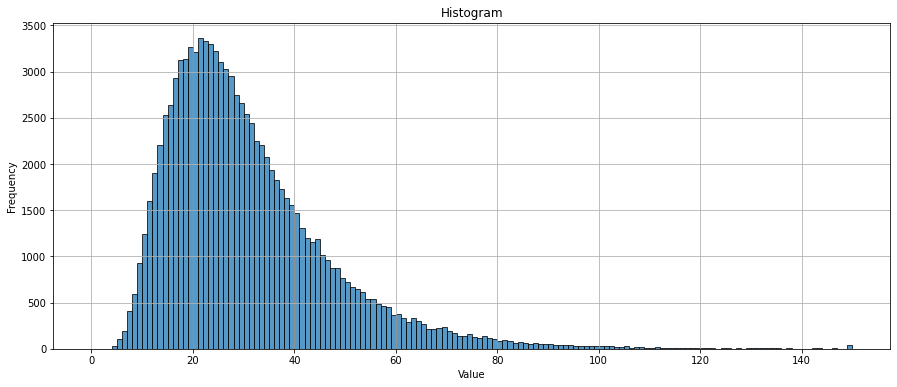

In [36]:
plt.figure(figsize=(15, 6))
# Plot the histogram
plt.hist(daily_iphone_sold, bins=(MAX_VALUE-MIN_VALUE),range=(MIN_VALUE, MAX_VALUE), edgecolor='black', alpha=0.75)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

plt.grid()
# Show the plot
plt.show()

In [37]:
# Generate data
# Number of iPhone sold by Roger each day
NUM_DAYS = 1000
MIN_VALUE = 0
MAX_VALUE = 150

### Non-Uniform, Non-Gaussian distribution

In [38]:
# Define the range of integers and their probabilities
integers = np.arange(MIN_VALUE, MAX_VALUE)  # integers from MIN_VALUE to MAX_VALUE
weights = np.random.rand(len(integers))  # random weights for each integer
probabilities = weights / np.sum(weights)  # normalize the weights to get probabilities

# Generate random samples following the custom non-uniform distribution
daily_iphone_sold = np.random.choice(integers, size=NUM_DAYS, p=probabilities)

# Print the first 10 samples
print("First 10 samples:", daily_iphone_sold[:10])

First 10 samples: [ 56 122   8  67  52  14 144  26  88  46]


In [39]:
daily_iphone_sold.mean()

70.347

In [40]:
np.median(daily_iphone_sold)

68.0

In [41]:
st.mode(daily_iphone_sold)

ModeResult(mode=array([18]), count=array([21]))

In [42]:
np.histogram(daily_iphone_sold, range=(MIN_VALUE, MAX_VALUE), bins=15)

(array([71, 84, 76, 96, 46, 65, 77, 52, 77, 62, 47, 58, 73, 65, 51]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150.]))

In [43]:
# Count the occurrences of each number using collections.Counter
counter = Counter(daily_iphone_sold)
# Get the top N numbers with the highest appearance
N = 5
top_n_numbers = counter.most_common(N)

# Print the top N numbers
print(f"Top {N} numbers with the highest appearance: {top_n_numbers}")

Top 5 numbers with the highest appearance: [(18, 21), (26, 19), (4, 17), (39, 17), (129, 16)]


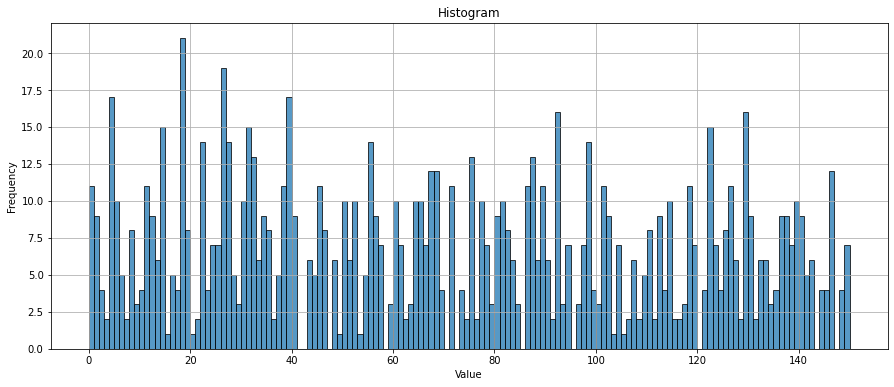

In [44]:
plt.figure(figsize=(15, 6))
# Plot the histogram
plt.hist(daily_iphone_sold, bins=(MAX_VALUE-MIN_VALUE),range=(MIN_VALUE, MAX_VALUE), edgecolor='black', alpha=0.75)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

plt.grid()
# Show the plot
plt.show()